In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")

In [ ]:
df.columns

Index(['avg_year_temp', 'ph', 'rainfall', 'N', 'P', 'K', 'crop'], dtype='object')

In [ ]:
df['crop'].unique()

array(['cowpea', 'mustard', 'safflower', 'linseed', 'wheat', 'urad',
       'turmeric', 'sunflower', 'sugarcane', 'rice', 'ragi', 'potato',
       'onion', 'greengram', 'maizerabi', 'maizekharif', 'jowar',
       'groundnut', 'bengalgram', 'drychillies', 'cottonlint',
       'coriander', 'bajra', 'arhar'], dtype=object)

In [ ]:
c=df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop']=c.cat.codes

In [ ]:
targets.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [ ]:
targets.values()

dict_values(['arhar', 'bajra', 'bengalgram', 'coriander', 'cottonlint', 'cowpea', 'drychillies', 'greengram', 'groundnut', 'jowar', 'linseed', 'maizekharif', 'maizerabi', 'mustard', 'onion', 'potato', 'ragi', 'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad', 'wheat'])

In [ ]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (4344, 6)
Outputs shape  (4344,)


In [3]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# we must apply the scaling to the test set as well that we are computing for the training set
x_test = scaler.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,24)
y_test=to_categorical(y_test,24)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(3475, 24)
(869, 24)


In [ ]:
from keras.models import Sequential  #Models->Layers->modules 
from keras.layers import Dense       #Keras is a wrapper to tenorflow as a book
input_size=6
output_size=24
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='sigmoid',input_shape=(input_size,)))
ann_model.add(Dense(units=output_size,activation='softmax'))

In [ ]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                448       
                                                                 
 dense_3 (Dense)             (None, 24)                1560      
                                                                 
Total params: 2,008
Trainable params: 2,008
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'],
                  steps_per_execution=10)
#Here we are configuring/assigning parameters of the model for training

In [ ]:
#below block code is throwing some error due to mismatch so need to run this code
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model_results=ann_model.fit(x_train,y_train,
              epochs=20,
              batch_size=30,
              validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


93/93 [==============================] - 3s 30ms/step - loss: 3.0990 - categorical_accuracy: 0.1543 - val_loss: 2.9851 - val_categorical_accuracy: 0.2129
Epoch 2/20
93/93 [==============================] - 3s 34ms/step - loss: 2.8499 - categorical_accuracy: 0.3327 - val_loss: 2.7591 - val_categorical_accuracy: 0.3669
Epoch 3/20
93/93 [==============================] - 3s 31ms/step - loss: 2.5998 - categorical_accuracy: 0.4698 - val_loss: 2.5040 - val_categorical_accuracy: 0.4259
Epoch 4/20
93/93 [==============================] - 2s 26ms/step - loss: 2.3297 - categorical_accuracy: 0.5266 - val_loss: 2.2407 - val_categorical_accuracy: 0.4835
Epoch 5/20
93/93 [==============================] - 2s 26ms/step - loss: 2.0670 - categorical_accuracy: 0.5763 - val_loss: 1.9855 - val_categorical_accuracy: 0.6432
Epoch 6/20
93/93 [==============================] - 2s 26ms/step - loss: 1.8279 - categorical_accuracy: 0.6752 - val_loss: 1.7667 - val_categorical_accuracy: 0.7612
Epoch 7/20
93/93 [===

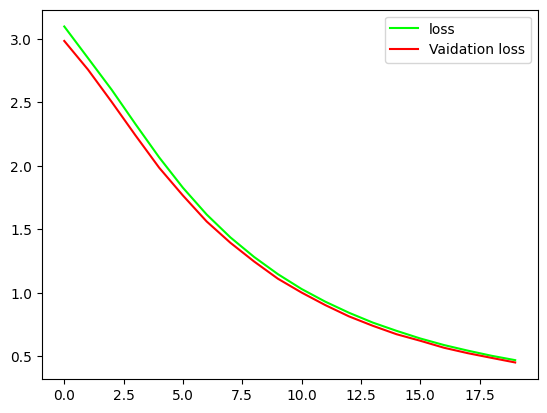

In [ ]:
plt.plot(model_results.history['loss'],color="#00ff00",label="loss")
plt.plot(model_results.history['val_loss'],color="#ff0000",label="Vaidation loss")
plt.legend() #adds axis label
plt.show()

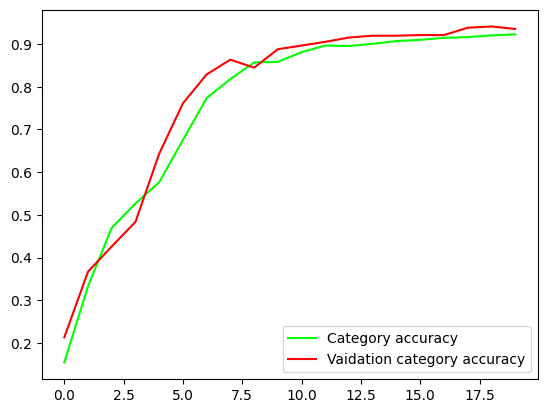

In [ ]:
plt.plot(model_results.history['categorical_accuracy'],color="#00ff00",label="Category accuracy")
plt.plot(model_results.history['val_categorical_accuracy'],color="#ff0000",label="Vaidation category accuracy")
plt.legend() #adds axis label
plt.show()

In [ ]:
import pickle
#saving the model
pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl", "wb"))

In [ ]:
# function to return key for any value 
def get_key(val): 
    for key, value in targets.items(): 
         if (val == key): 
             return value 

In [ ]:
targets

{0: 'arhar',
 1: 'bajra',
 2: 'bengalgram',
 3: 'coriander',
 4: 'cottonlint',
 5: 'cowpea',
 6: 'drychillies',
 7: 'greengram',
 8: 'groundnut',
 9: 'jowar',
 10: 'linseed',
 11: 'maizekharif',
 12: 'maizerabi',
 13: 'mustard',
 14: 'onion',
 15: 'potato',
 16: 'ragi',
 17: 'rice',
 18: 'safflower',
 19: 'sugarcane',
 20: 'sunflower',
 21: 'turmeric',
 22: 'urad',
 23: 'wheat'}

In [ ]:
for key,value in targets.items():
   print(key)      #Output: message
   print(value)

0
arhar
1
bajra
2
bengalgram
3
coriander
4
cottonlint
5
cowpea
6
drychillies
7
greengram
8
groundnut
9
jowar
10
linseed
11
maizekharif
12
maizerabi
13
mustard
14
onion
15
potato
16
ragi
17
rice
18
safflower
19
sugarcane
20
sunflower
21
turmeric
22
urad
23
wheat


In [ ]:
print(type(y_test[0][0]))

<class 'numpy.float32'>


In [ ]:

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/scalers_crop_yield/crop_wheat.csv_scaler.pkl','rb'))
data =loaded_scale.transform( np.array([[	25.499573,	7.405498	,298.897352	,	9.228892,	10.670175,	10.100367	]]))
prediction = loaded_model.predict(data)[0]

top3_indices = np.argsort(prediction)[-3:]
top3_codes = [get_key(idx) for idx in top3_indices]
top3_predictions = [prediction[idx] for idx in top3_indices]

print("Top 3 codes:", top3_codes)
print("Top 3 predictions:", top3_predictions)

code = np.argmax(prediction)
accuracy = np.max(prediction) * 100
print("Code is", code, "with accuracy", accuracy, "%")

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 164ms/step
Top 3 codes: ['drychillies', 'maizerabi', 'turmeric']
Top 3 predictions: [0.014794296, 0.016241414, 0.9517599]
Code is 21 with accuracy 95.17598748207092 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

y_pred_ann = np.round(loaded_model.predict(x_test)).astype(int)

print('Results for ann Model')

# matrix_plot=confusion_matrix(y_test, y_pred_ann)
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
#                              display_labels=bnb.classes_)
# disp.plot()

print(classification_report(y_test, y_pred_ann))


28/28 [==============================] - 0s 4ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Results for ann Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        38
           4       1.00      0.08      0.15        38
           5       1.00      0.58      0.73        33
           6       0.67      0.41      0.51        29
           7       1.00      0.56      0.72        41
           8       1.00      0.89      0.94        28
           9       1.00      0.91      0.96        35
          10       0.96      0.62      0.76        40
          11       1.00      1.00      1.00        32
          12       1.00      0.95      0.98        43
          13       1.00      0.85      0.92        33
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        43
          16       1.00      0.32      0.49        37
     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv")
c = df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop'] = c.cat.codes

# Split the data into training and testing sets
x = df.drop('crop', axis=1).values
y = df['crop'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2022, test_size=0.2)

# Standardize the training and testing data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert y_train and y_test to categorical format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the neural network model
input_size = x_train.shape[1]
output_size = num_classes
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='sigmoid', input_shape=(input_size,)))
ann_model.add(Dense(units=output_size, activation='softmax'))

# Compile the model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train the model
model_results = ann_model.fit(x_train, y_train, epochs=20, batch_size=30, validation_split=0.2)

# Make predictions on the test data and convert them to categorical format
y_pred_ann = ann_model.predict(x_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)
y_test = np.argmax(y_test, axis=1)

# Generate the confusion matrix and classification report
matrix_plot = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix:\n', matrix_plot)
print('Classification Report:\n', classification_report(y_test, y_pred_ann))

pickle.dump(ann_model, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/ann_w_report.pkl", "wb"))

Epoch 1/20
 3/93 [..............................] - ETA: 2s - loss: 3.4716 - categorical_accuracy: 0.0333

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


93/93 [==============================] - 3s 28ms/step - loss: 3.1702 - categorical_accuracy: 0.0604 - val_loss: 3.0362 - val_categorical_accuracy: 0.1338
Epoch 2/20
93/93 [==============================] - 3s 27ms/step - loss: 2.9098 - categorical_accuracy: 0.3119 - val_loss: 2.8074 - val_categorical_accuracy: 0.4647
Epoch 3/20
93/93 [==============================] - 3s 33ms/step - loss: 2.6662 - categorical_accuracy: 0.4529 - val_loss: 2.5648 - val_categorical_accuracy: 0.3813
Epoch 4/20
93/93 [==============================] - 3s 36ms/step - loss: 2.4005 - categorical_accuracy: 0.4813 - val_loss: 2.3009 - val_categorical_accuracy: 0.4388
Epoch 5/20
93/93 [==============================] - 3s 31ms/step - loss: 2.1293 - categorical_accuracy: 0.5392 - val_loss: 2.0432 - val_categorical_accuracy: 0.5540
Epoch 6/20
93/93 [==============================] - 4s 45ms/step - loss: 1.8801 - categorical_accuracy: 0.6644 - val_loss: 1.8064 - val_categorical_accuracy: 0.7007
Epoch 7/20
93/93 [===